In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score, accuracy_score,confusion_matrix
%pip install seaborn
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [2]:
df= pd.read_csv("data/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [3]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [4]:
df.isnull().sum() # data is not include any null values 

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df=df.drop(columns=['customer_id'])

In [6]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [111]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='gender', ylabel='churn'>

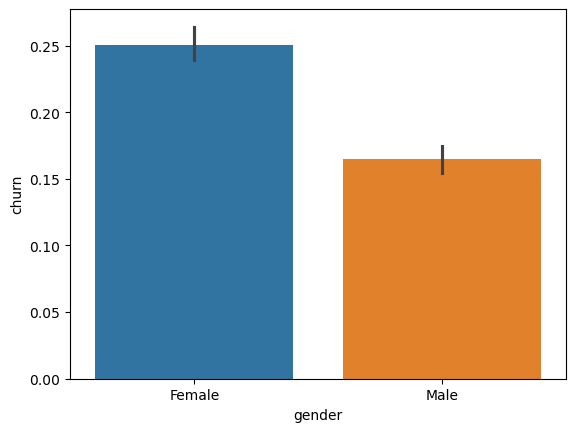

In [7]:
sns.barplot(df,x=df.gender,y=df.churn,hue=df.gender) # check which gender  tends to leave

<AxesSubplot:xlabel='country', ylabel='churn'>

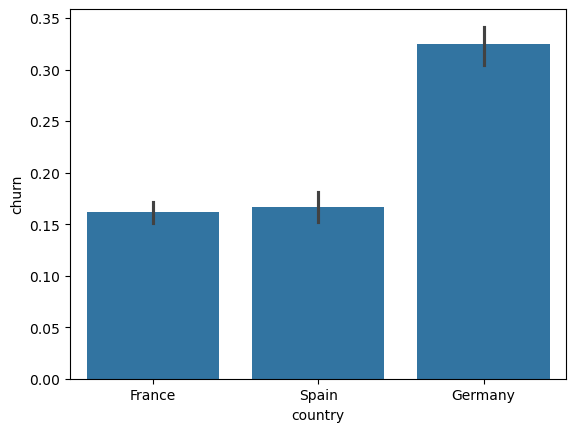

In [8]:
sns.barplot(df,x=df.country,y=df.churn) #  check which country tend to churn

<AxesSubplot:xlabel='tenure', ylabel='churn'>

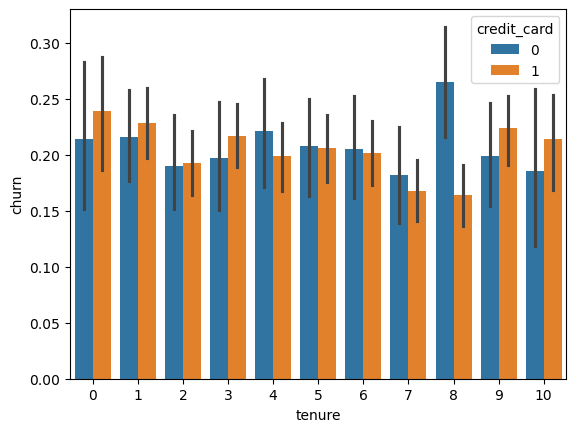

In [9]:
sns.barplot(df,x=df.tenure,y=df.churn,hue=df.credit_card) #  check the number of years and effect this with churn beside the activation of credit_card

**importance of each categorical variable**

In [10]:
categorical= df.select_dtypes(include="object") # list all categorical data in our data set 
categorical

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [11]:
for c in categorical:
    print(c)
    impo=mutual_info_score(df[c],df.churn)
    print(impo)  # it seem that country has  the heighst effect of churn than gender 

country
0.014017045772466472
gender
0.005652197849223051


**plot the feature importance**

In [12]:
feature=['country','gender']
impo=[0.014017045772466472,0.005652197849223051]
impo_df = pd.DataFrame({'Feature': feature, 'Importance': impo})


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

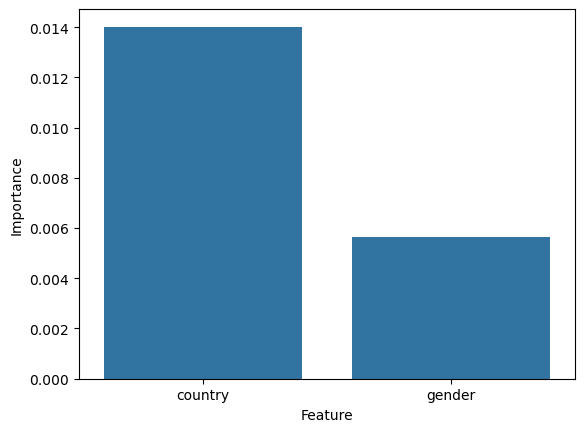

In [13]:
sns.barplot(data=impo_df,x=impo_df.Feature,y=impo_df.Importance)

**check the correlation between numerical value**

In [14]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [15]:
numerical=df.select_dtypes(exclude="object") # list all numerical columns
numerical

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [16]:
corr_matrix=numerical.corr()
corr_matrix

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

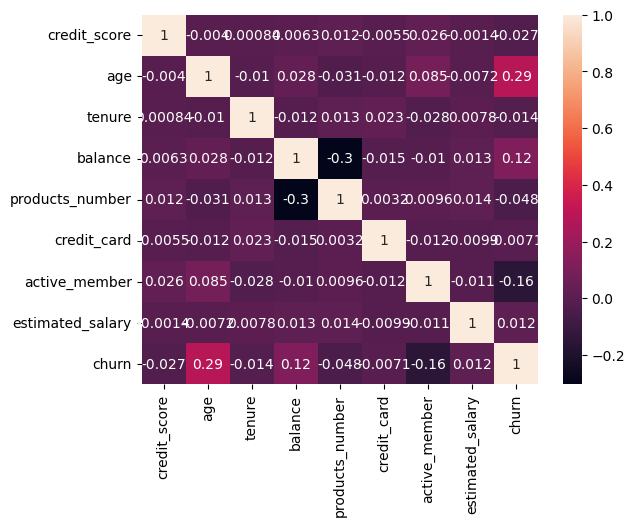

In [17]:

sns.heatmap(corr_matrix,annot=True)

<AxesSubplot:>

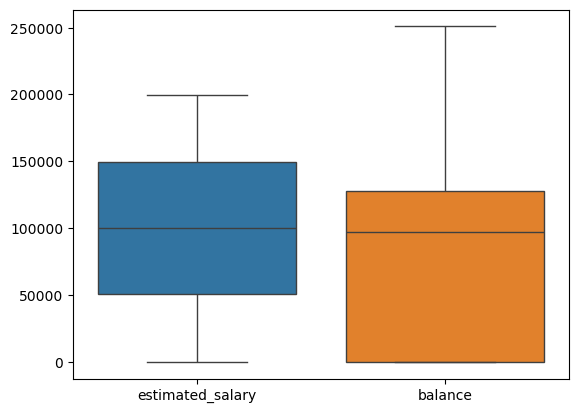

In [110]:
sns.boxplot(data=df[['estimated_salary','balance']]) # check the outliers

## split the data 

In [18]:
X=df.drop(columns="churn") # feature matrix 
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [19]:
y=df.churn.values
y.shape

(10000,)

In [20]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6000, 10)
(2000, 10)
(2000, 10)


In [22]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6000,)
(2000,)
(2000,)


**convert categorical varibles to numerical**

In [62]:
DV= DictVectorizer(sparse=False)
x_train_dict=X_train.to_dict(orient='records') # convert X_train to dictionary before feed it to DictVectorizer
x_train=DV.fit_transform(x_train_dict)
x_train

array([[0.0000000e+00, 2.9000000e+01, 7.7919780e+04, ..., 1.0000000e+00,
        1.2254758e+05, 7.0000000e+00],
       [1.0000000e+00, 3.9000000e+01, 1.0994939e+05, ..., 0.0000000e+00,
        4.1268650e+04, 4.0000000e+00],
       [0.0000000e+00, 4.2000000e+01, 9.3955830e+04, ..., 0.0000000e+00,
        1.4828540e+04, 9.0000000e+00],
       ...,
       [0.0000000e+00, 2.8000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        9.2865410e+04, 1.0000000e+00],
       [0.0000000e+00, 3.5000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        9.5009600e+04, 5.0000000e+00],
       [1.0000000e+00, 2.6000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        1.5659823e+05, 7.0000000e+00]])

**train the model**

In [24]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
x_val_dict=X_test.to_dict(orient="records")
x_val=DV.transform(x_val_dict)  # convert x_validation 

In [26]:
pre_val=model.predict(x_val) # preform prediction with validation Data 

In [27]:
accuracy_score(pre_val,y_val)*100 # check the accurcy

77.45

In [28]:
x_test_dict=X_test.to_dict(orient="records")
x_test=DV.transform(x_val_dict) # convert the test data 

In [29]:
y_pre_test=model.predict(x_test)

In [30]:
accuracy_score(y_test,y_pre_test)*100

80.05

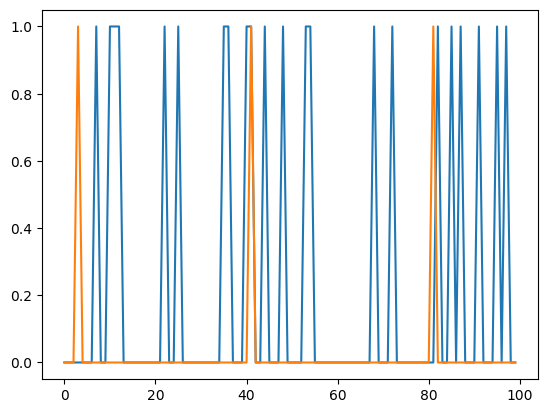

In [31]:
plt.plot(y_test[:100])
plt.plot(y_pre_test[:100])

## **let us try to illuminate the features with low effects on churn and check the accuracy**

In [32]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [33]:
new_feature=['country','age','balance','active_member','estimated_salary','tenure','churn']

In [34]:
df_new=df[new_feature]

In [35]:
df_new

,country,age,balance,active_member,estimated_salary,tenure,churn
0,France,42,0.00,1,101348.88,2,1
1,Spain,41,83807.86,1,112542.58,1,0
2,France,42,159660.80,0,113931.57,8,1
3,France,39,0.00,0,93826.63,1,0
4,Spain,43,125510.82,1,79084.10,2,0
...,...,...,...,...,...,...,...
9995,France,39,0.00,0,96270.64,5,0
9996,France,35,57369.61,1,101699.77,10,0
9997,France,36,0.00,1,42085.58,7,1
9998,Germany,42,75075.31,0,92888.52,3,1


In [36]:
X=df_new.drop(columns='churn')
y=df_new['churn'].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [37]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6000, 6)
(2000, 6)
(2000, 6)


In [39]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6000,)
(2000,)
(2000,)


In [40]:
x_train_dict=X_train.to_dict(orient='records') # convert X_train to dictionary before feed it to DictVectorizer
x_train=DV.fit_transform(x_train_dict)
x_train

array([[0.0000000e+00, 2.9000000e+01, 7.7919780e+04, ..., 1.0000000e+00,
        1.2254758e+05, 7.0000000e+00],
       [1.0000000e+00, 3.9000000e+01, 1.0994939e+05, ..., 0.0000000e+00,
        4.1268650e+04, 4.0000000e+00],
       [0.0000000e+00, 4.2000000e+01, 9.3955830e+04, ..., 0.0000000e+00,
        1.4828540e+04, 9.0000000e+00],
       ...,
       [0.0000000e+00, 2.8000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        9.2865410e+04, 1.0000000e+00],
       [0.0000000e+00, 3.5000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        9.5009600e+04, 5.0000000e+00],
       [1.0000000e+00, 2.6000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        1.5659823e+05, 7.0000000e+00]])

In [41]:
model_2 = LogisticRegression()
model_2.fit(x_train,y_train)

LogisticRegression()

In [42]:
x_val_dict=X_test.to_dict(orient="records")
x_val=DV.transform(x_val_dict)  # convert x_validation 

In [43]:
y_val_pred2=model_2.predict(x_val)

In [44]:
accuracy_score(y_val_pred2,y_val)

0.7935

In [45]:
x_test_dict=X_test.to_dict(orient="records")
x_test=DV.transform(x_val_dict) # convert the test data

In [46]:
 y_test_pred2=model_2.predict(x_test)

In [47]:
accuracy_score(y_test_pred2,y_test)*100 # as we can see the model performance is become a little bit higher

80.35

## let us try new model such as ridge model  with differnce alpha prameters [0, 0.01, 0.1, 1, 10]

In [63]:
alpha_param=[0, 0.01, 0.1, 1, 10]

for val in alpha_param:
  reg_model=Ridge(alpha=val,solver='sag', random_state=42)
  reg_model.fit(x_train,y_train)
  y_pre_val=reg_model.predict(x_val)
  score =mean_squared_error(y_pre_val,y_val)
  print (f"alpah is {val}  MSE is {score}",)

/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpah is 0  MSE is 0.16697741769015056


/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpah is 0.01  MSE is 0.166977417690126


/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpah is 0.1  MSE is 0.1669774176900276


/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpah is 1  MSE is 0.1669774176888469


/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpah is 10  MSE is 0.16697741767723695


# let us summrise what we did 

In [99]:

data={
  'model_name':['model','model_2'],
  ' type_test_data':["validation","test"],
  'accurcy_socre_val':[77.45,80.05],
    'accurcy_socre_test':[79.35,80.35]
}

In [100]:
model_df=pd.DataFrame(data)
model_df

,model_name,type_test_data,accurcy_socre_val,accurcy_socre_test
0,model,validation,77.45,79.35
1,model_2,test,80.05,80.35
